In [1]:
import numpy as np
import sympy as smp
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import PillowWriter

In [2]:
t, m, g = smp.symbols('t m g')
the = smp.symbols(r'\theta', cls=smp.Function)
the = the(t)
the_d = smp.diff(the, t)
the_dd = smp.diff(the_d, t)

In [3]:
the_dd

Derivative(\theta(t), (t, 2))

In [4]:
x, y = smp.symbols('x y', cls=smp.Function)
x = x(the)
y = y(the)

In [5]:
path='taut'
if path =='taut':
    x = smp.sin(2*the) + 2*the
    y = 1 - smp.cos(2*the)
    x_f = smp.lambdify(the, x)
    y_f = smp.lambdify(the, y)
if path =='parab':
    x = the
    y = the**2
    x_f = smp.lambdify(the, x)
    y_f = smp.lambdify(the, y)
    

In [6]:
#define T, V and L
T = 1/2 *m *(smp.diff(x,t)**2 + smp.diff(y,t)**2)
V = m*g*y
L = T - V
L

-g*m*(1 - cos(2*\theta(t))) + 0.5*m*((2*cos(2*\theta(t))*Derivative(\theta(t), t) + 2*Derivative(\theta(t), t))**2 + 4*sin(2*\theta(t))**2*Derivative(\theta(t), t)**2)

In [7]:
LE = smp.diff(L, the) - smp.diff(smp.diff(L, the_d), t)
LE = LE.simplify()
LE

m*(-2.0*g*sin(2*\theta(t)) + 8.0*sin(2*\theta(t))*Derivative(\theta(t), t)**2 - 8.0*cos(2*\theta(t))*Derivative(\theta(t), (t, 2)) - 8.0*Derivative(\theta(t), (t, 2)))

In [8]:
#in order to receive solvable equations by ODE, sort for 2nd derivative
deriv_2 = smp.solve(LE, the_dd)[0]
deriv_1 = the_d

In [9]:
#for solving in python numerically, a second order ODE can be transformed to a set of 2 1st order ODE
deriv_2

0.25*(-g + 4.0*Derivative(\theta(t), t)**2)*tan(\theta(t))

In [10]:
deriv_1

Derivative(\theta(t), t)

In [11]:
#Convert this into numpy expression
deriv2_f = smp.lambdify((g, the, the_d), deriv_2)
deriv1_f = smp.lambdify(the_d, the_d)

In [12]:
deriv2_f(2,2,2)

-7.647639521415316

In [13]:
#create ODE

def dSdt(S, t):
    return[
        deriv1_f(S[1]), #dtheta/dt equals to omega
        deriv2_f(g, S[0], S[1]) #domega/dt
    ]

In [14]:
#solve
t = np.linspace(0, 20, 1000)
g = 9.81
ans1 = odeint(dSdt, y0=[np.pi/4, 0], t=t) #y0 [init Theta, Init Omega]
ans2 = odeint(dSdt, y0=[np.pi/5, 0], t=t)

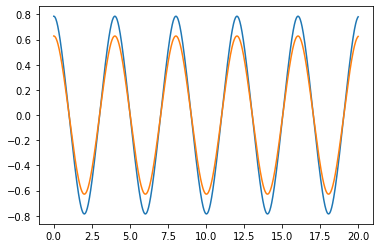

In [15]:
#plot
plt.plot(t, ans1.T[0])
plt.plot(t, ans2.T[0])


In [16]:
def get_xy(theta):
    return x_f(theta), y_f(theta)

In [17]:
x1, y1 = get_xy(ans1.T[0])
x2, y2 = get_xy(ans2.T[0])

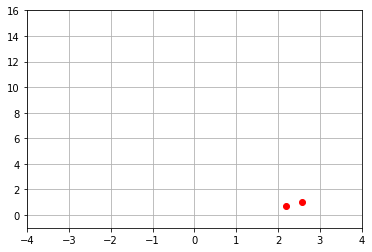

In [18]:
def animate(i):
    ln1.set_data([x1[i]], [y1[i]])
    ln2.set_data([x2[i]], [y2[i]])
    
fig, ax = plt.subplots(1,1)
ax.grid()
ln1, = plt.plot([], [], 'ro')
ln2, = plt.plot([], [], 'ro')
ax.set_ylim(-1, 16)
ax.set_xlim(-4, 4)
ani = animation.FuncAnimation(fig, animate, frames=1000, interval=50)
ani.save('pen1.gif', writer='pillow', fps=50)